In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
crash_df=sns.load_dataset("car_crashes")
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<h1>Distribution Plots<h1>

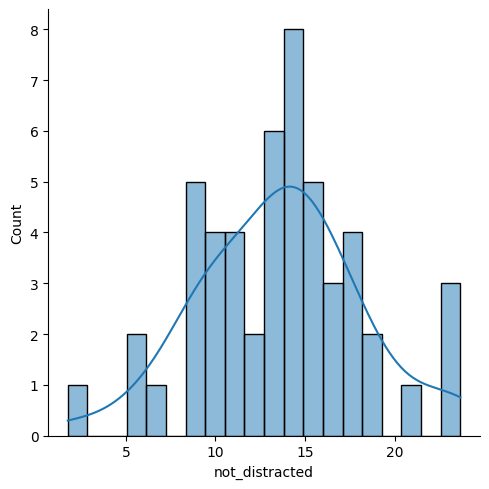

In [4]:
# Provides a way to look at a univariate distribution.
sns.displot(crash_df["not_distracted"],kde=True,bins=20)
plt.show()

<h1>Joint Plot<h1>

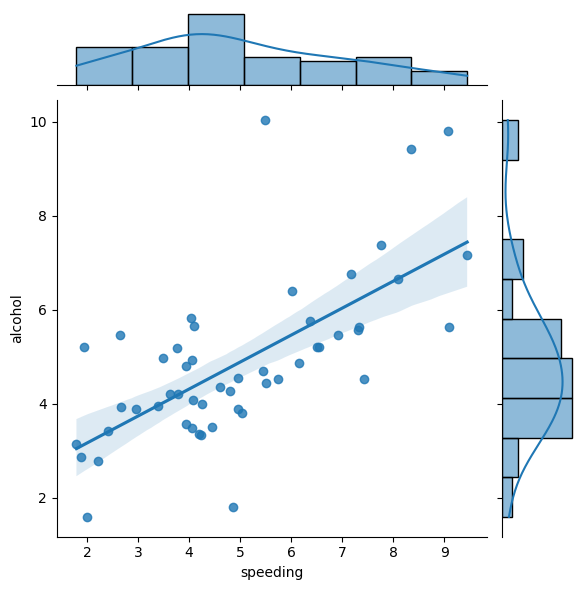

In [5]:
# Jointplot compares 2 distributions and plots a scatter plot by default
sns.jointplot(x="speeding",y="alcohol",data=crash_df,kind="reg")
plt.show()

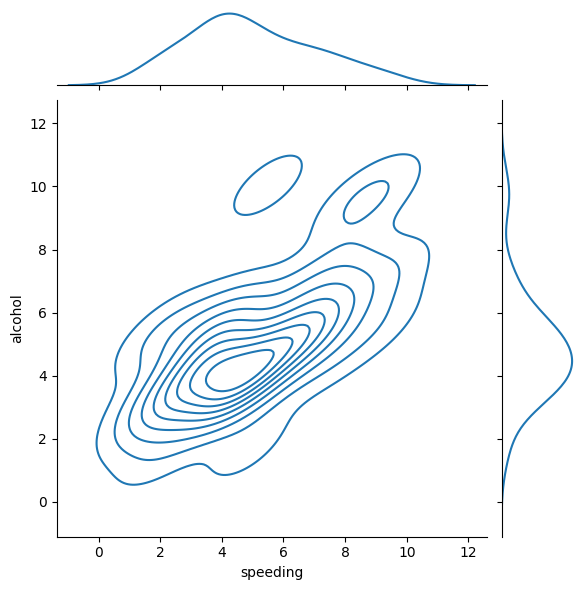

In [6]:
sns.jointplot(x="speeding",y="alcohol",data=crash_df,kind="kde")
plt.show()

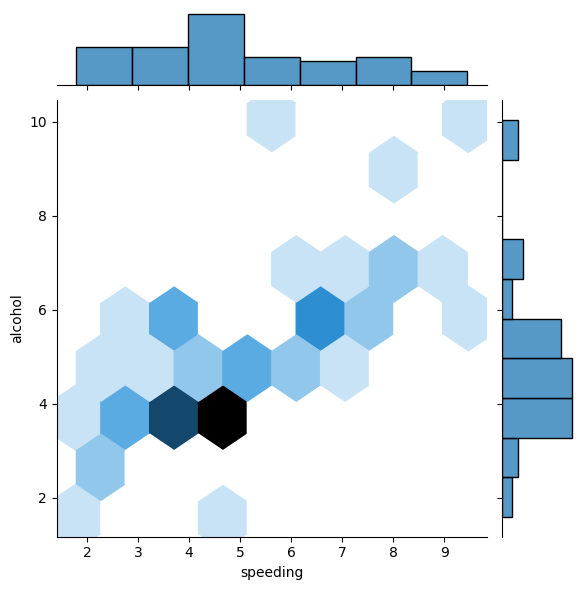

In [7]:
sns.jointplot(x="speeding",y="alcohol",data=crash_df,kind="hex")
plt.show()

<h1> Kernel density estimation plot<h1>

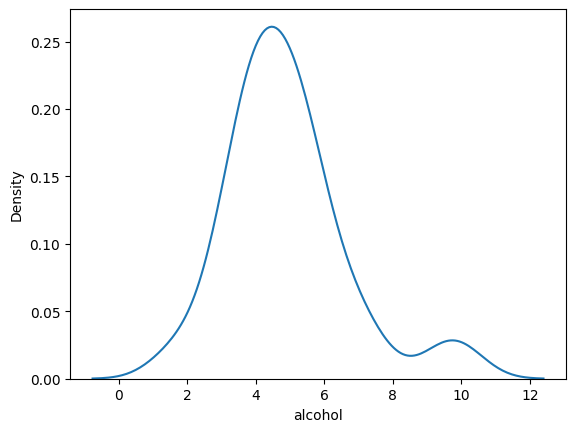

In [8]:
sns.kdeplot(crash_df["alcohol"])
plt.show()

<h1>Pair plot<h1>

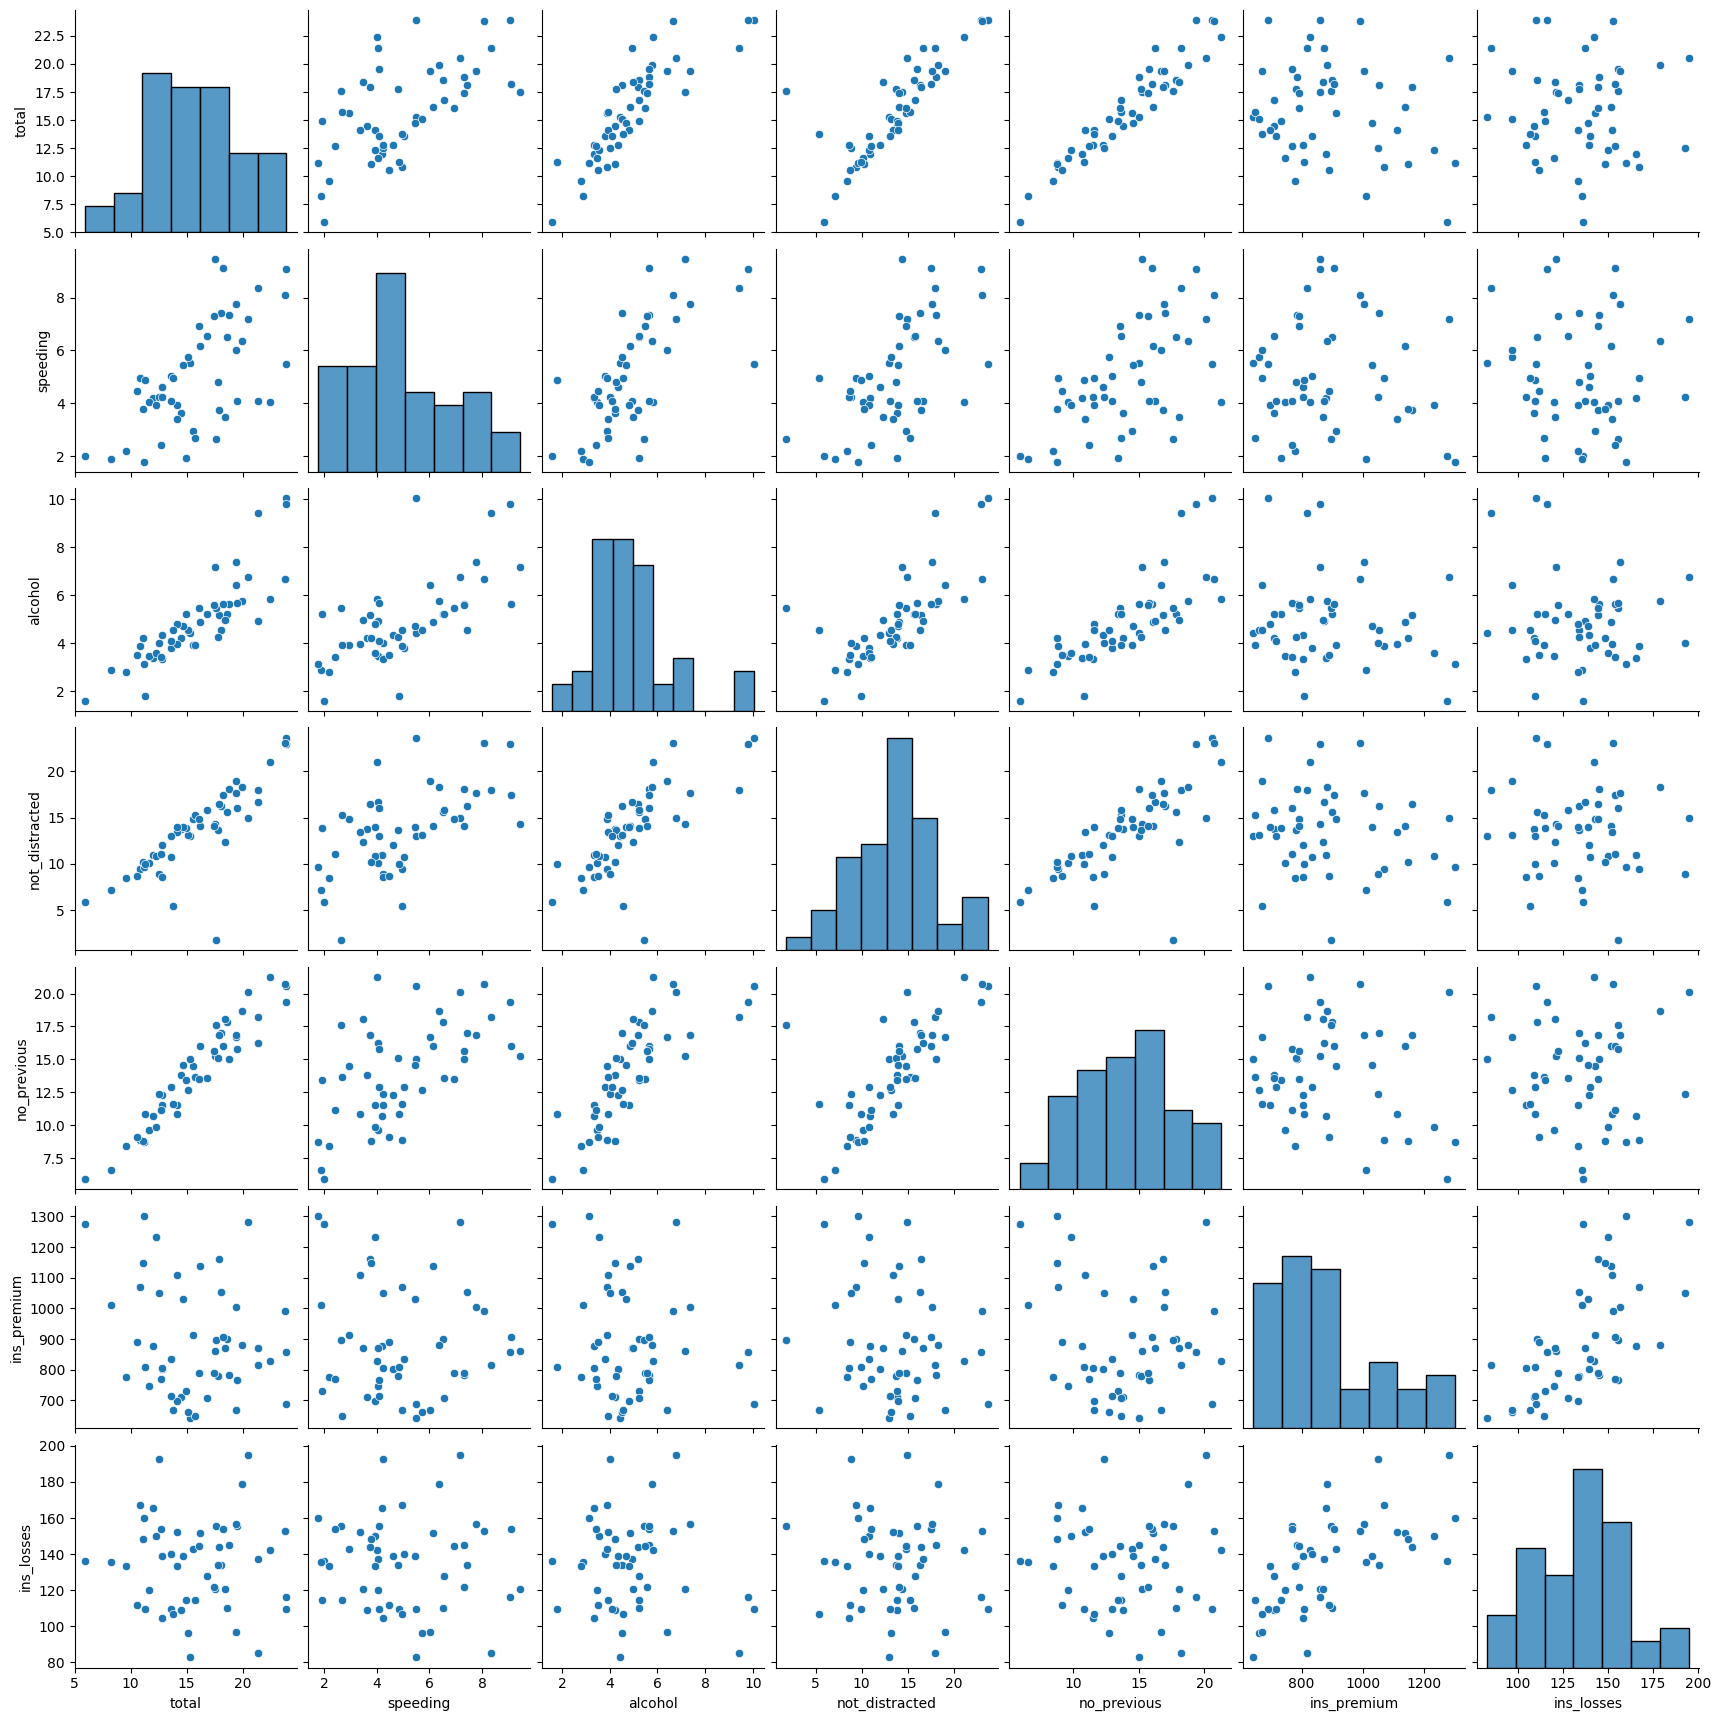

In [9]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)
plt.show()

In [10]:
tips_df=sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


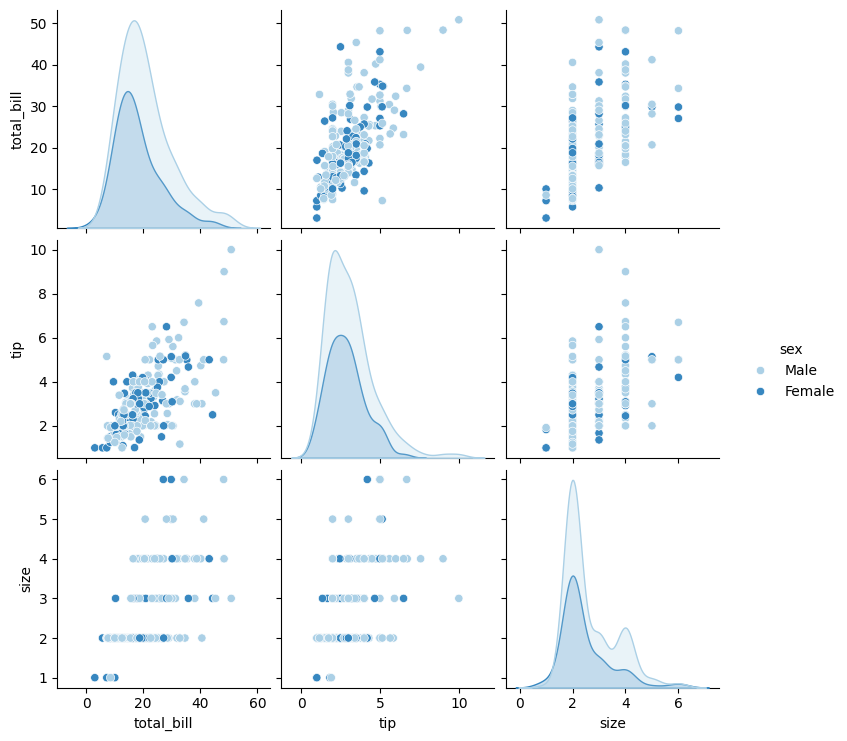

In [11]:
sns.pairplot(tips_df,hue="sex",palette="Blues")
plt.show()

<h1>Rug plot<h1>

<Axes: xlabel='tip'>

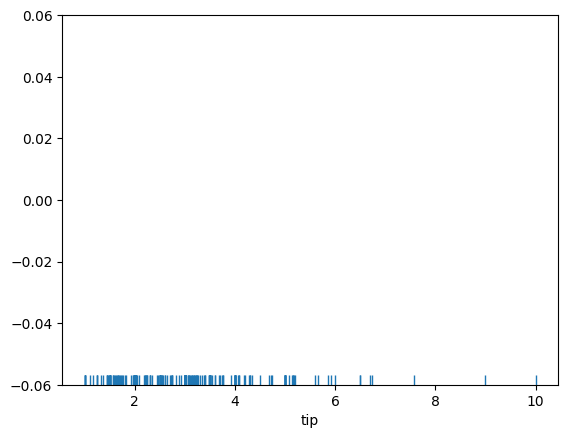

In [12]:
# Plots a single column of datapoints in an array as sticks on an axis
sns.rugplot(tips_df["tip"])

Styling

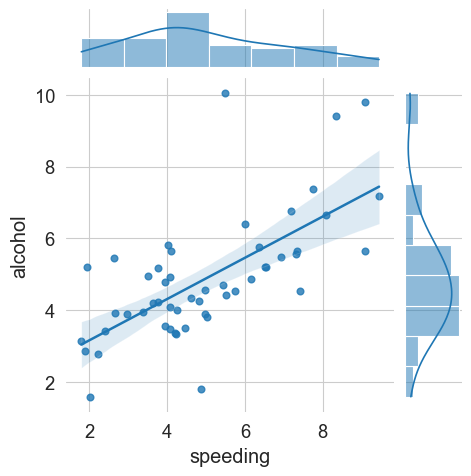

In [13]:
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1.5)
sns.jointplot(x="speeding",y="alcohol",data=crash_df,kind="reg",height=5)
sns.despine(left=True,bottom=True)
plt.show()

<h1>Categorical Plots<h1>

<h2>Bar Plot<h2>

<Axes: xlabel='sex', ylabel='total_bill'>

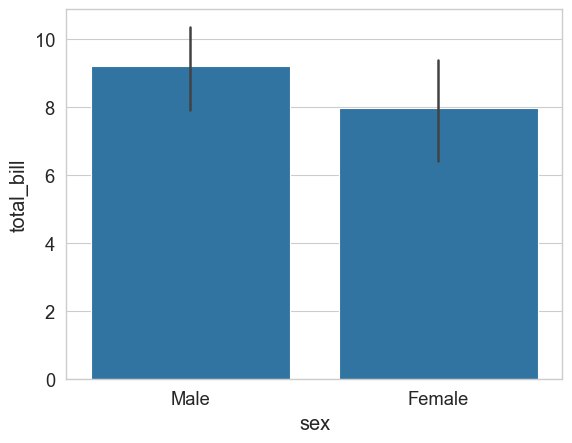

In [14]:
sns.barplot(x="sex",y="total_bill",data=tips_df,estimator=np.std)

<h2>Count plot<h2>

<Axes: xlabel='sex', ylabel='count'>

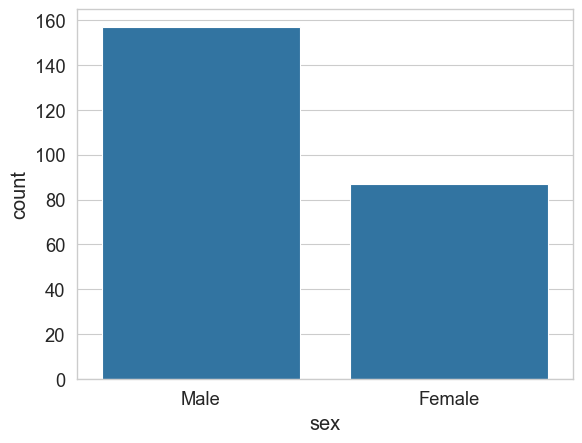

In [15]:
# A count plot is like a bar plot, but the estimator is counting
sns.countplot(x="sex",data=tips_df)

<h2>Box plot<h2>

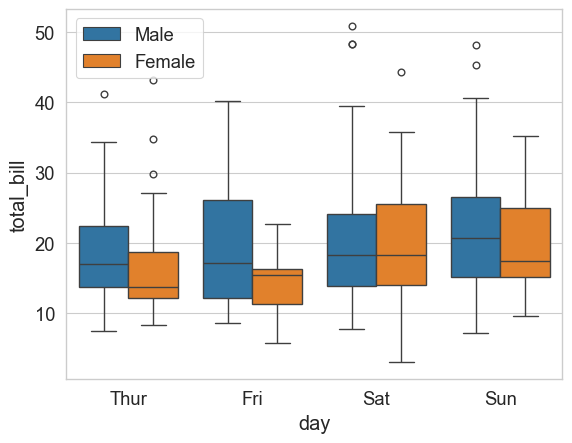

In [16]:
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
sns.boxplot(x="day",y="total_bill",data=tips_df,hue="sex")
plt.legend(loc=0)

<h2>Violin Plot<h2>

<Axes: xlabel='day', ylabel='total_bill'>

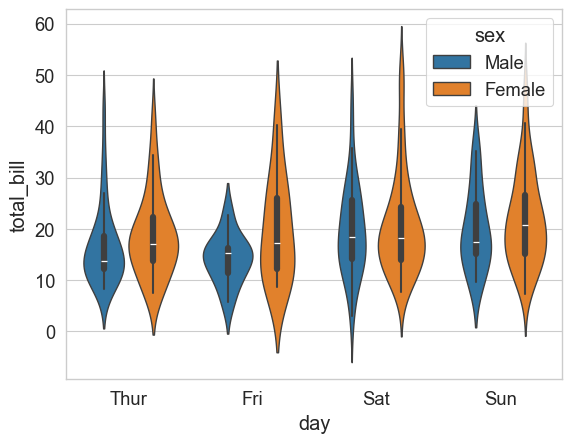

In [17]:
# Violin Plot is a combination of the boxplot and KDE
sns.violinplot(x="day",y="total_bill",data=tips_df,hue="sex",split=False)

<h2>Strip Plot<h2>

<Axes: xlabel='day', ylabel='total_bill'>

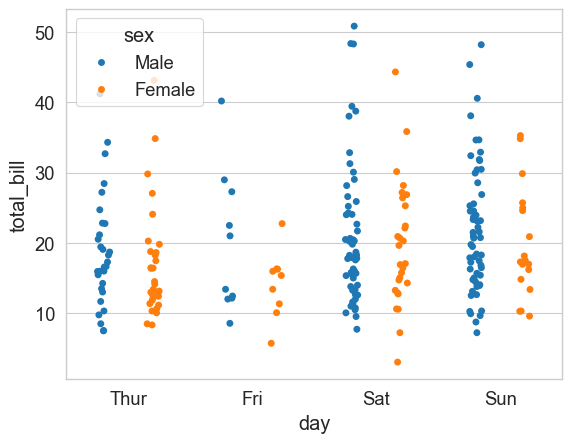

In [18]:
"""" The strip plot draws a scatter plot representing all data points where one
 variable is categorical. It is often used to show all observations with 
 a box plot that represents the average distribution"""

sns.stripplot(x="day",y="total_bill",data=tips_df,jitter=True,hue="sex",dodge=True)

<h2>Swarm Plot<h2>

<Axes: xlabel='day', ylabel='total_bill'>

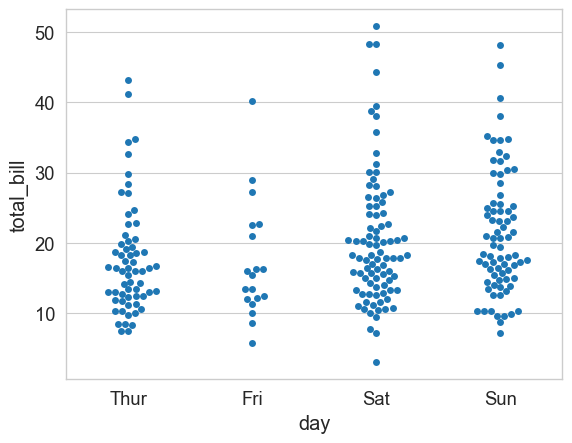

In [19]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
sns.swarmplot(x="day",y="total_bill",data=tips_df)

<Axes: xlabel='day', ylabel='total_bill'>

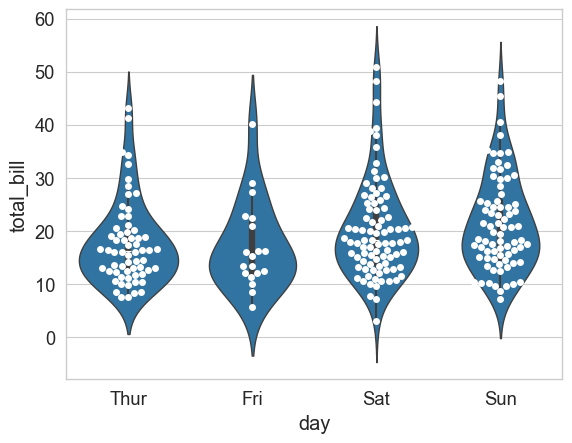

In [20]:
sns.violinplot(x="day",y="total_bill",data=tips_df)
sns.swarmplot(x="day",y="total_bill",data=tips_df,color="white")

<h2>Palettes<h2>

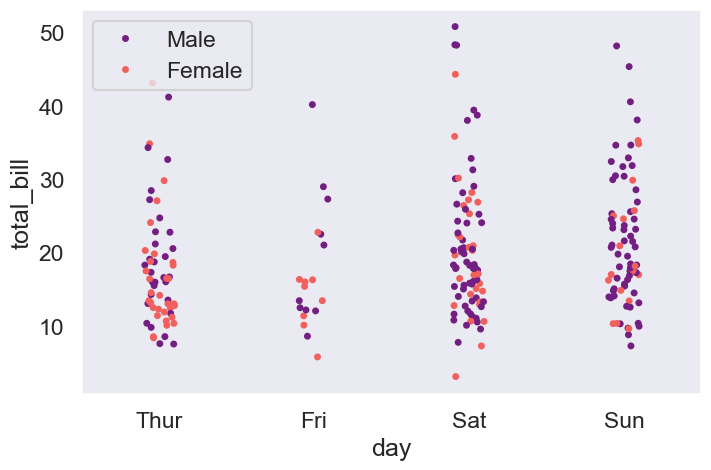

In [21]:
plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.set_context("talk")
sns.stripplot(x="day",y="total_bill",data=tips_df,hue="sex",palette='magma')
plt.legend(loc=0)

<h1>Matrix Plots<h1>

<h2>Heatmaps<h2>

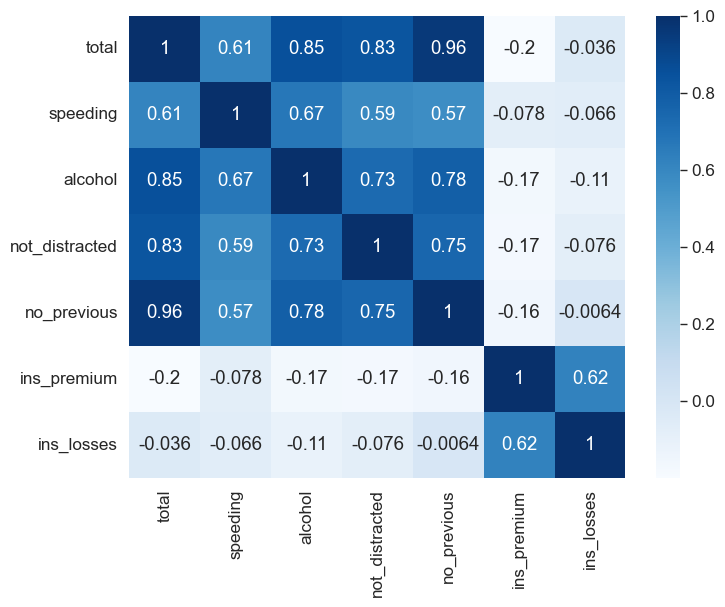

In [27]:
plt.figure(figsize=(8,6))
sns.set_context("paper",font_scale=1.4)
numeric_cols = crash_df.select_dtypes(include=['float64', 'int64']).columns
crash_mx = crash_df[numeric_cols].corr()
sns.heatmap(crash_mx,annot=True,cmap="Blues")
plt.show()

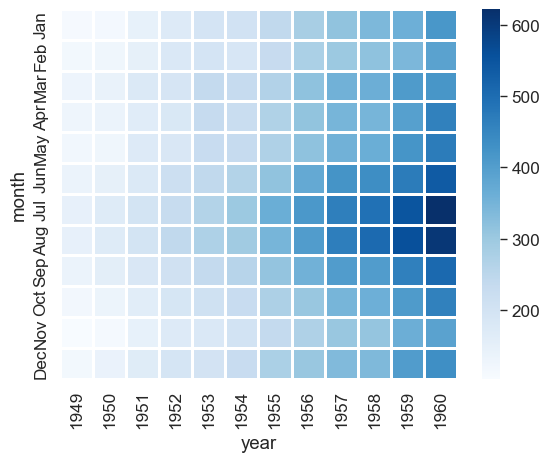

In [46]:
flight=sns.load_dataset("flights")
flight=flight.pivot_table(index="month",columns='year',values='passengers')
sns.heatmap(flight,cmap="Blues",linecolor="white",linewidths=1)
plt.show()

<h2>Cluster Map<h2>

<Figure size 100x100 with 0 Axes>

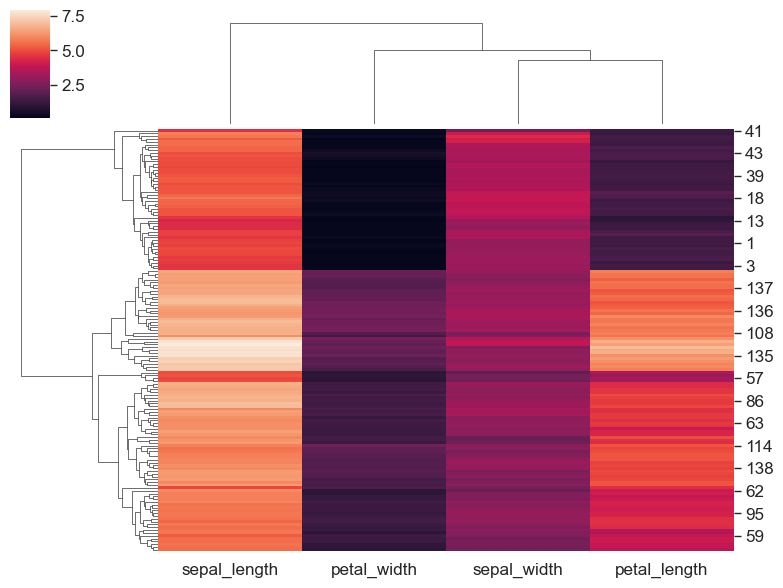

In [57]:
plt.figure(figsize=(1,1))
iris=sns.load_dataset("iris")
species=iris.pop("species")
sns.clustermap(iris,figsize=(8, 6))

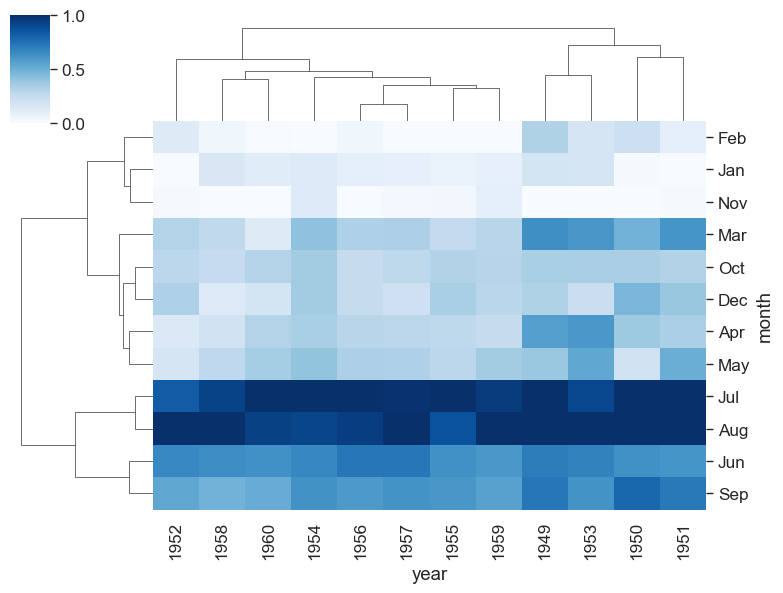

In [58]:
sns.clustermap(flight,cmap='Blues',standard_scale=1,figsize=(8, 6))

<h2>PairGrid<h2>

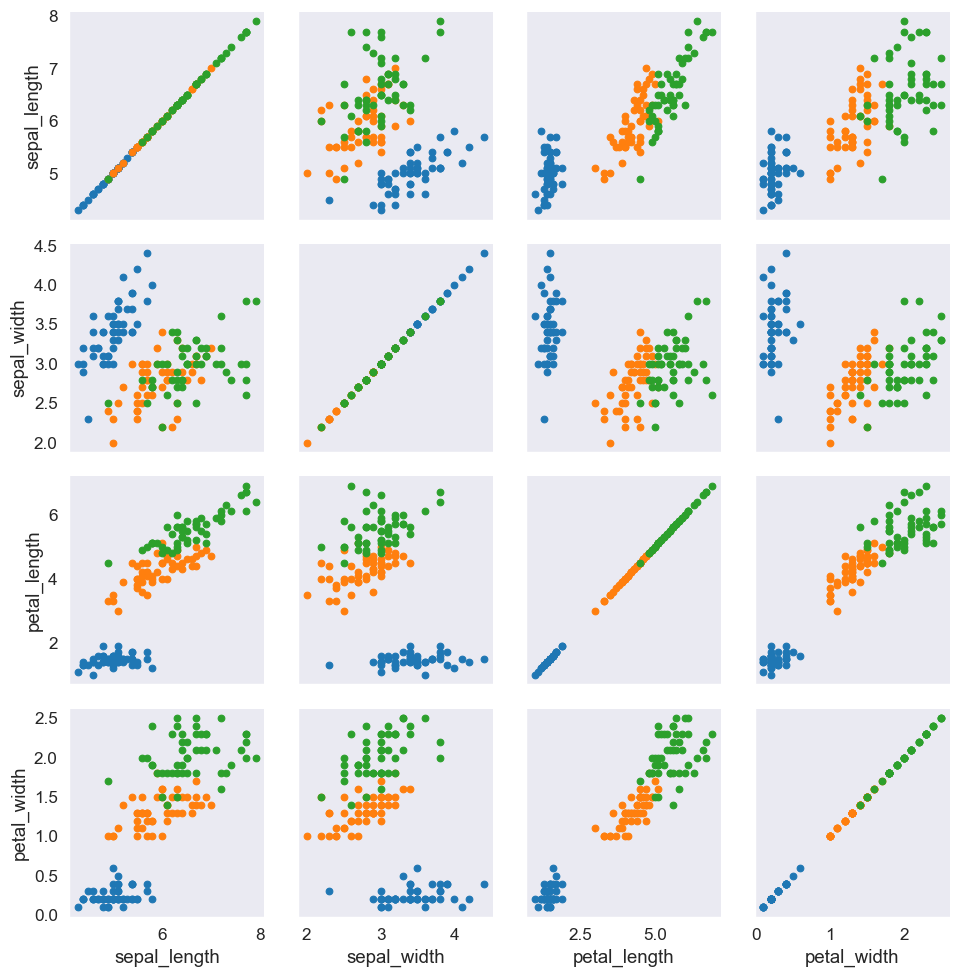

In [62]:
iris=sns.load_dataset("iris")
iris_pg=sns.PairGrid(iris,hue="species")
iris_pg.map(plt.scatter)

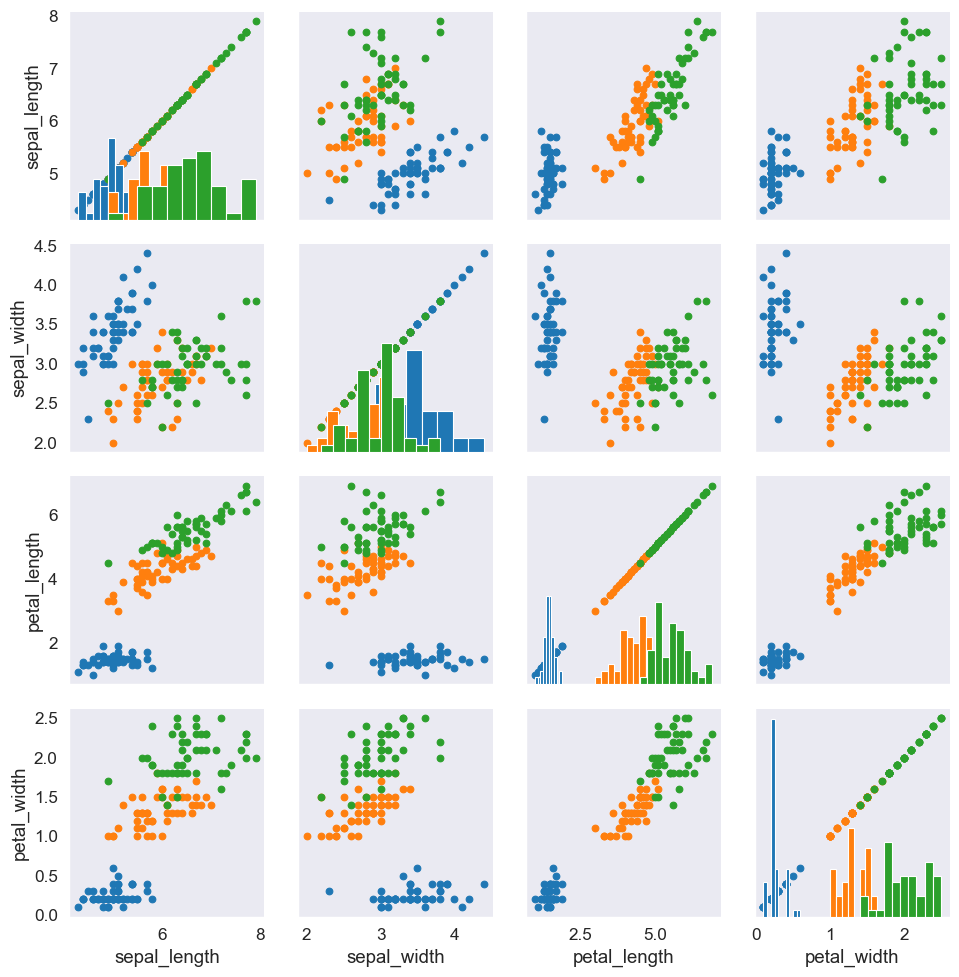

In [67]:
iris_pg=sns.PairGrid(iris,hue="species")
iris_pg.map(plt.scatter)
iris_pg.map_diag(plt.hist)

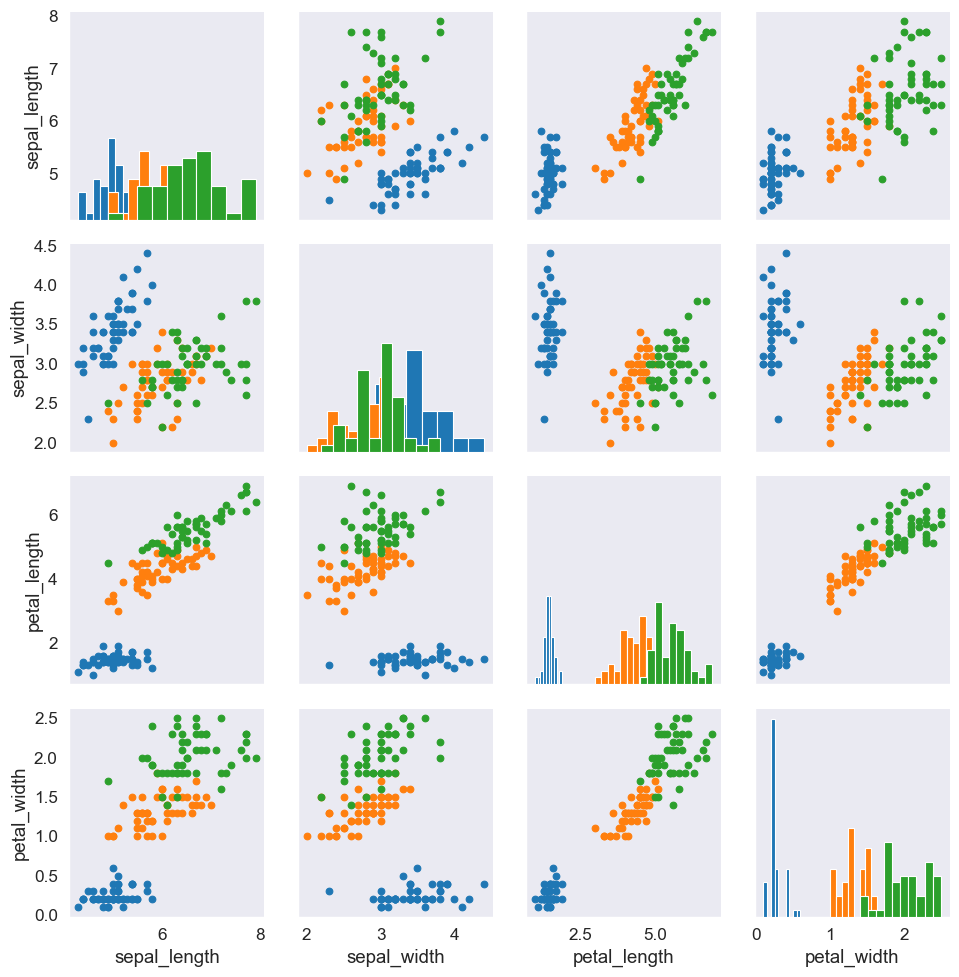

In [73]:
iris_pg=sns.PairGrid(iris,hue="species")
iris_pg.map_diag(plt.hist)
iris_pg.map_offdiag(plt.scatter)

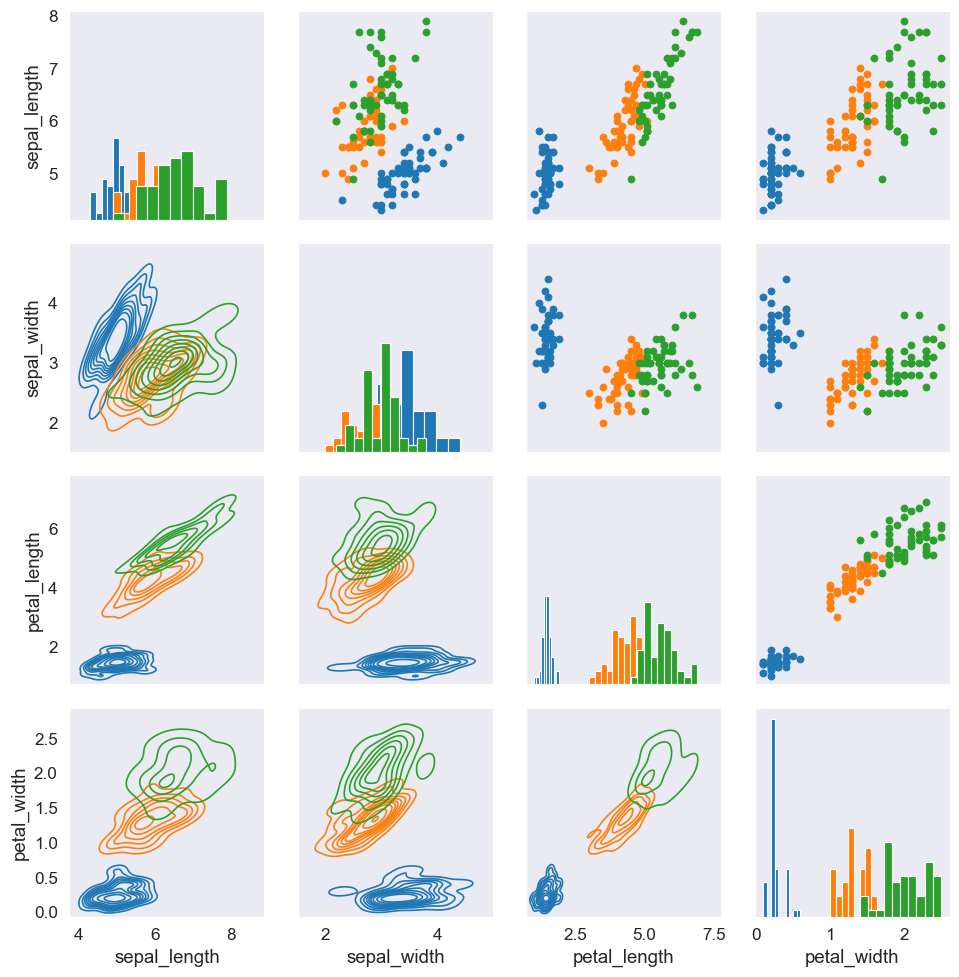

In [72]:
iris_pg=sns.PairGrid(iris,hue="species")
iris_pg.map_diag(plt.hist)
iris_pg.map_upper(plt.scatter)
iris_pg.map_lower(sns.kdeplot)

<h2>Facet Grid<h2>

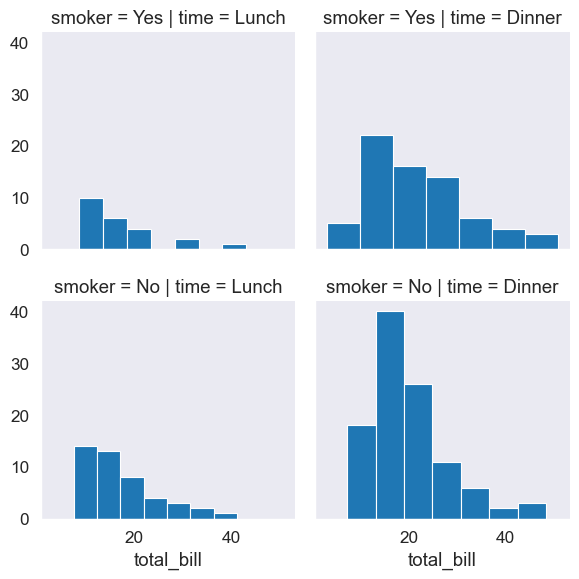

In [76]:
tips_fg=sns.FacetGrid(tips_df,col='time',row='smoker')
tips_fg.map(plt.hist,'total_bill',bins=7)

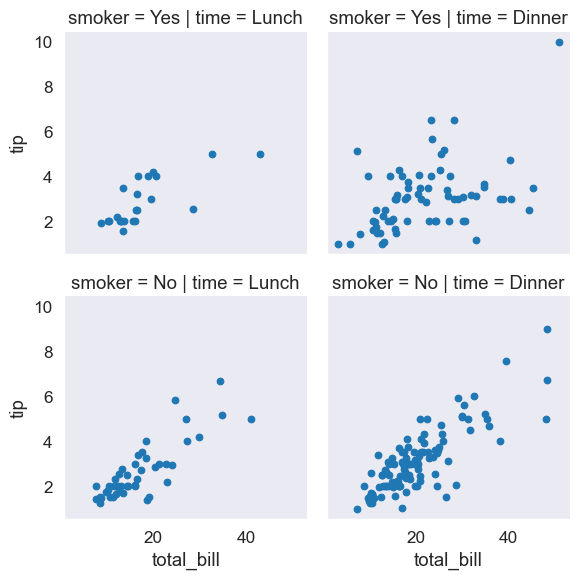

In [83]:
tips_fg=sns.FacetGrid(tips_df,col='time',row='smoker')
tips_fg.map(plt.scatter,'total_bill','tip')

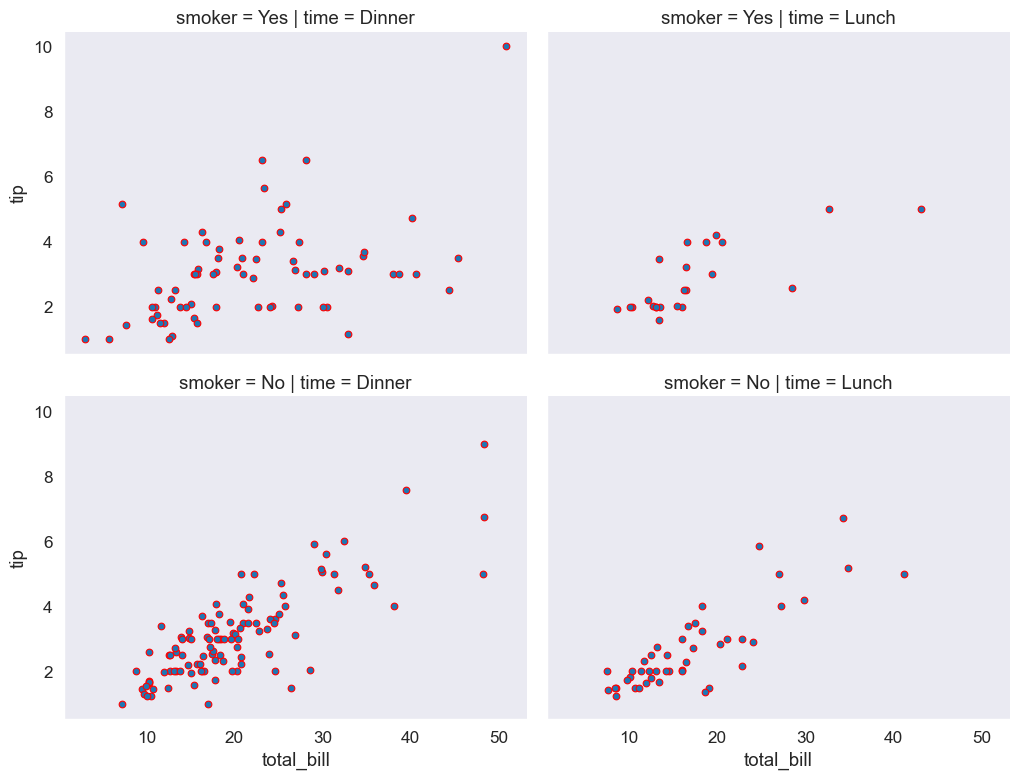

In [85]:
tips_fg=sns.FacetGrid(tips_df,col='time',row='smoker',height=4,aspect=1.3,
                      col_order=["Dinner",'Lunch'],palette='Set1')
tips_fg.map(plt.scatter,'total_bill','tip',edgecolor='r')

<h2>Regression Plot<h2>

In [92]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


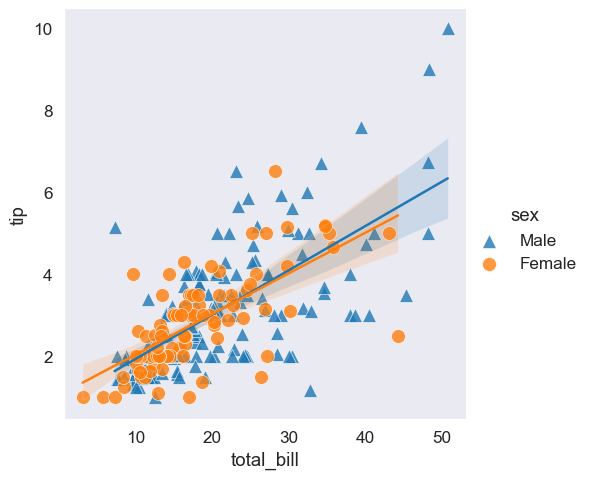

In [94]:
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips_df,markers=['^','o'],
           scatter_kws={'s':100,'linewidths':0.5,'edgecolor':'w'})
plt.show()